In [1]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pylab as plt

KeyboardInterrupt: 

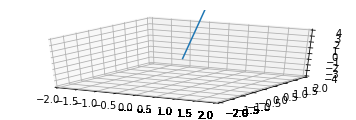

In [6]:
data_t = open("data_t", "r")
data_w = open("data_w", "r")
data_a = open("data_a", "r")
data_n = open("data_n", "r")

t_array = np.fromfile(data_t, dtype=np.double)
w_array = np.fromfile(data_w, dtype=np.double)
a_array = np.fromfile(data_a, dtype=np.double)
n_array = np.fromfile(data_n, dtype=np.double)
p_l = []
q_l = []
r_l = []
t_l = []

mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
i = 0

for t in t_array:
    
    #there we draw 3d plot
    ax = fig.add_subplot(2, 1, 2, projection='3d')
    ax.cla()
    ax.set_xlim3d(-2, 2)
    ax.set_ylim3d(-2, 2)
    ax.set_zlim3d(-4, 4)
    
    #draw vector w
    x_l = np.linspace(0, w_array[3*i], 2)
    y_l = np.linspace(0, w_array[3*i + 1], 2)
    z_l = np.linspace(0, w_array[3*i + 2], 2)

    i = i + 1
    ax.plot(x_l, y_l, z_l, label='A=80 B=80 C=1 p_0 = 0 q_0 = 5 r_0 = 80')
    plt.savefig('frames/euler_{:04.0f}.png'.format(t*1000), bbox_inches = 'tight', dpi = 240)

In [ ]:
#there we draw 2d plot
    t_l.append(t)
    p_l.append(w_array[3*i])
    q_l.append(w_array[3*i + 1])
    r_l.append(w_array[3*i + 2])
    
    ax = fig.add_subplot(2, 1, 1)
    ax.cla()
    ax.plot(t_l, p_l, label = 'p(t)')
    ax.legend()
    plt.title('t = {:.2f} c'.format(t))
    
    
#there we draw 3d plot
    ax = fig.add_subplot(2, 1, 2, projection='3d')
    ax.cla()
    ax.set_xlim3d(-2, 2)
    ax.set_ylim3d(-2, 2)
    ax.set_zlim3d(-4, 4)
    
#draw vector a
    x_l = np.linspace(0, a_array[3*i], 2)
    y_l = []
    z_l = []

    for x in x_l:
        y_l.append(a_array[3*i + 1]*x/a_array[3*i])
        z_l.append(a_array[3*i + 2]*x/a_array[3*i])
    
    ax.plot(x_l, y_l, z_l, label='A=81 B=80 C=1 p_0 = 1 q_0 = 0 r_0 = 100')
    
    #draw vector n
    x_l = np.linspace(a_array[3*i] - 0.1, a_array[3*i] + 0.1, 2)
    y_l = []
    z_l = []

    for x in x_l:
        y_l.append(n_array[3*i + 1]*(x-a_array[3*i])/n_array[3*i] + a_array[3*i + 1])
        z_l.append(n_array[3*i + 2]*(x-a_array[3*i])/n_array[3*i] + a_array[3*i + 2])
    
    ax.plot(x_l, y_l, z_l, label='A=81 B=80 C=1 p_0 = 1 q_0 = 0 r_0 = 100')